<a href="https://colab.research.google.com/github/Pooja14n/CryptoClustering/blob/main/Crypto_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.0 MB/s eta 0:00:00


In [3]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [6]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [7]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(
    df_market_data[["price_change_percentage_24h",	"price_change_percentage_7d",	"price_change_percentage_14d",	"price_change_percentage_30d",	"price_change_percentage_60d",	"price_change_percentage_200d",	"price_change_percentage_1y"]]
)

market_data_scaled[:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [20]:
# Create a DataFrame with the scaled data
df_crypto_scaled = pd.DataFrame(
    market_data_scaled,
    columns=["price_change_percentage_24h",	"price_change_percentage_7d",	"price_change_percentage_14d",	"price_change_percentage_30d",	"price_change_percentage_60d",	"price_change_percentage_200d",	"price_change_percentage_1y"]
)


# Copy the crypto names from the original data
df_crypto_scaled["coin_id"] = df_market_data.index

# Set the coinid column as index
df_crypto_scaled = df_crypto_scaled.set_index("coin_id")

# Display sample data
df_crypto_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [22]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [23]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_crypto_scaled)
    inertia.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [24]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


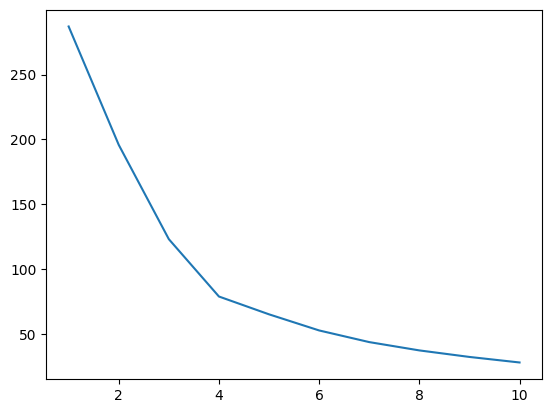

In [25]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.plot(k, inertia)
plt.show()

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** The elbow curve indicates that `4` is the best value for k.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [26]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=4)

In [27]:
# Fit the K-Means model using the scaled data
model.fit(df_crypto_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=4)

In [28]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4 = model.predict(df_crypto_scaled)

# Print the resulting array of cluster values.
print(k_4)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [29]:
# Create a copy of the DataFrame
df_crypto_scaled_predictions = df_crypto_scaled.copy()

In [30]:
# Add a new column to the DataFrame with the predicted clusters
df_crypto_scaled_predictions["predicted_clusters"] = k_4

# Display sample data
df_crypto_scaled_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


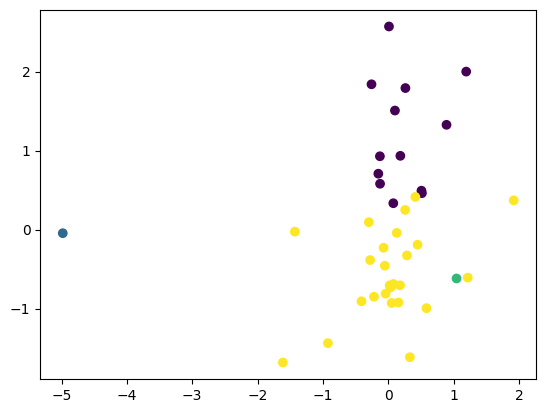

In [43]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

# df_crypto_scaled_predictions.hvplot.scatter(
#     x="price_change_percentage_24h",
#     y="price_change_percentage_7d",
#     by="predicted_clusters",
#     hover_cols="coin_id"
# )

plt.scatter(df_crypto_scaled_predictions["price_change_percentage_24h"], df_crypto_scaled_predictions["price_change_percentage_7d"], c=df_crypto_scaled_predictions["predicted_clusters"])
plt.show()

---

### Optimize Clusters with Principal Component Analysis.

In [36]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [40]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
crypto_pca = pca.fit_transform(df_crypto_scaled_predictions)

# View the first five rows of the DataFrame.
crypto_pca[:5]

array([[ 2.03409288, -0.64157137, -0.35762863],
       [ 1.99450168, -0.49054937, -0.91224962],
       [-1.06854412, -0.41720452,  0.5963108 ],
       [-1.04091865, -0.45523427,  0.4678008 ],
       [ 3.30276384, -1.24245766, -0.217276  ]])

In [41]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.36941241, 0.29169375, 0.22893878])

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** About 87% of the total variance is condensed into the 3 PCA variables.

In [44]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data
crypto_pca_df = pd.DataFrame(
    crypto_pca,
    columns=["PCA1", "PCA2", "PCA3"]
)

# Copy the crypto names from the original data
crypto_pca_df["coin_id"] = df_market_data.index

# Set the coinid column as index
crypto_pca_df = crypto_pca_df.set_index("coin_id")

# Display sample data
crypto_pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,2.034093,-0.641571,-0.357629
ethereum,1.994502,-0.490549,-0.912250
tether,-1.068544,-0.417205,0.596311
ripple,-1.040919,-0.455234,0.467801
bitcoin-cash,3.302764,-1.242458,-0.217276


---

### Find the Best Value for k Using the PCA Data

In [45]:
# Create a list with the number of k-values from 1 to 11
k_pca = list(range(1, 11))

In [46]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k_pca:
  k_model = KMeans(n_clusters=i)
  k_model.fit(crypto_pca_df)
  inertia_pca.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [47]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_pca, "inertia": inertia_pca}

# Create a DataFrame with the data to plot the Elbow curve
pca_df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
pca_df_elbow.head()

,k,inertia
0,1,325.734740
1,2,201.287622
2,3,111.736809
3,4,40.197284
4,5,29.514810


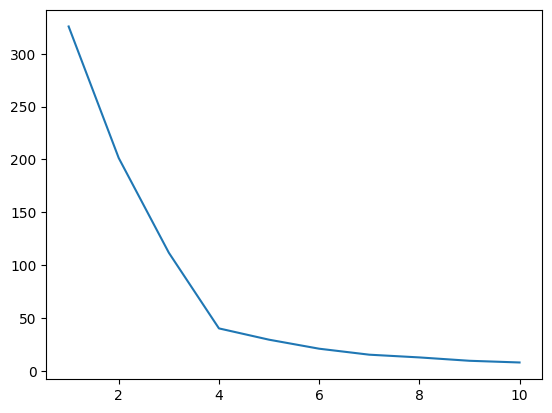

In [48]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.plot(k_pca, inertia_pca)
plt.show()

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** **Answer:** The elbow curve using the PCA data indicates that `4` is the best value for k.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It does not differ from the best value found using the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [49]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [50]:
# Fit the K-Means model using the PCA data
model.fit(crypto_pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [51]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_4_pca = model.predict(crypto_pca_df)

# Print the resulting array of cluster values.
print(k_4_pca)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [52]:
# Create a copy of the DataFrame with the PCA data
crypto_pca_predictions_df = crypto_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
crypto_pca_predictions_df["predicted_pca_clusters"] = k_4_pca

# Display sample data
crypto_pca_predictions_df.head()

,PCA1,PCA2,PCA3,predicted_pca_clusters
coin_id,,,,
bitcoin,2.034093,-0.641571,-0.357629,0
ethereum,1.994502,-0.490549,-0.912250,0
tether,-1.068544,-0.417205,0.596311,2
ripple,-1.040919,-0.455234,0.467801,2
bitcoin-cash,3.302764,-1.242458,-0.217276,0


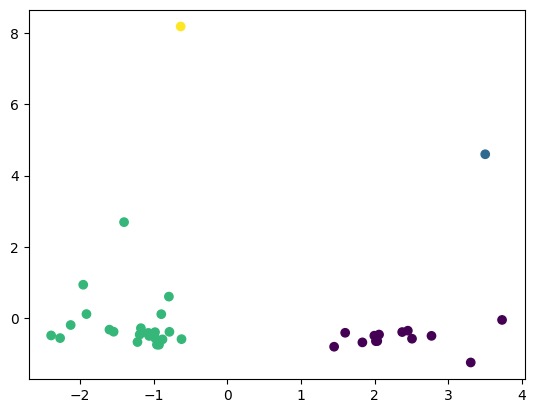

In [61]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

# crypto_pca_predictions_df.hvplot.scatter(
#     x="PCA1",
#     y="PCA2",
#     by="predicted_pca_clusters",
#     hover_cols="coin_id"
# )

plt.scatter(crypto_pca_predictions_df["PCA1"], crypto_pca_predictions_df["PCA2"], c=crypto_pca_predictions_df["predicted_pca_clusters"])
plt.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

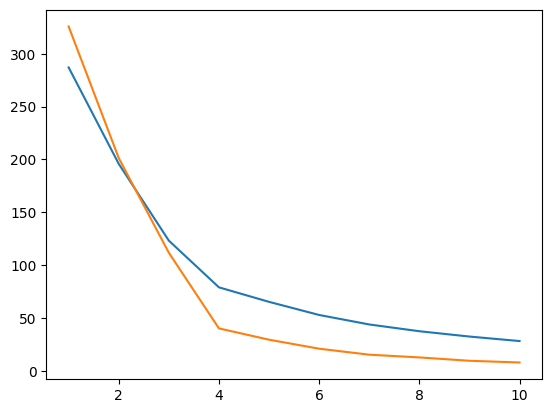

In [56]:
# Composite plot to contrast the Elbow curves
plt.plot(k, inertia) + plt.plot(k_pca, inertia_pca)

TypeError: unsupported operand type(s) for +: 'PathCollection' and 'PathCollection'

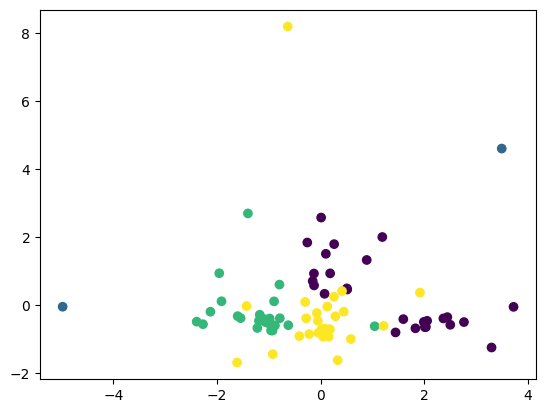

In [59]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
plt.scatter(df_crypto_scaled_predictions["price_change_percentage_24h"], df_crypto_scaled_predictions["price_change_percentage_7d"], c=df_crypto_scaled_predictions["predicted_clusters"]) + plt.scatter(crypto_pca_predictions_df["PCA1"], crypto_pca_predictions_df["PCA2"], c=crypto_pca_predictions_df["predicted_pca_clusters"])

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**